# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

<b>Problem Statement:</b> The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.<br>

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.<br>

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]<br>
<br>
<b>Objectives:</b> The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:
<br>
<br> 1: Do the users spend more time on the new landing page than on the existing landing page?
<br>
2: Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
<br>
3:Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]<br>

4: Is the time spent on the new page the same for the different language users?
<br>
<br>
Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.<br>

1: user_id - Unique user ID of the person visiting the website<br>
2: group - Whether the user belongs to the first group (control) or the second group (treatment)<br>
3: landing_page - Whether the landing page is new or old<br>
4: time_spent_on_the_page - Time (in minutes) spent by the user on the landing page<br>
5: converted - Whether the user gets converted to a subscriber of the news portal or not<br>
6: language_preferred - Language chosen by the user to view the landing page




## Import all the necessary libraries

In [2]:
import scipy
scipy.__version__
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [5]:
EnewsExpressData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Business Statistics /Project/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [6]:
EnewsExpressData.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [7]:
EnewsExpressData.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [8]:
EnewsExpressData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [9]:
EnewsExpressData.shape

(100, 6)

In [10]:
EnewsExpressData.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [11]:
EnewsExpressData.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


### Univariate Analysis

In [12]:
#Checking Unique Values of User ID
EnewsExpressData['user_id'].nunique() 

100

In [13]:
#Checking Unique Values of Time Spent on The Page
EnewsExpressData['time_spent_on_the_page'].nunique()

94

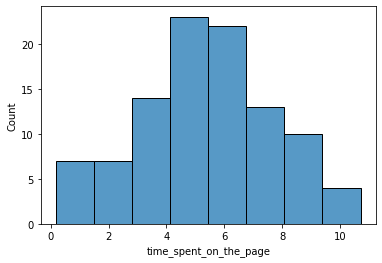

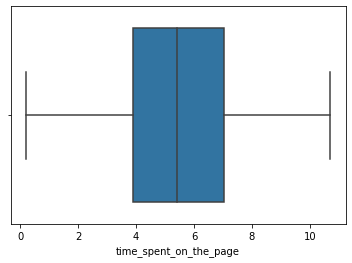

In [14]:
#Providing Graphs for the Time Spent on The Page
sns.histplot(data=EnewsExpressData, x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=EnewsExpressData, x='time_spent_on_the_page')
plt.show()

In [15]:
EnewsExpressData['time_spent_on_the_page'].mean()

5.377800000000001

In [16]:
EnewsExpressData['time_spent_on_the_page'].describe().T

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

In [17]:
#Analyzing The Groups
EnewsExpressData['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

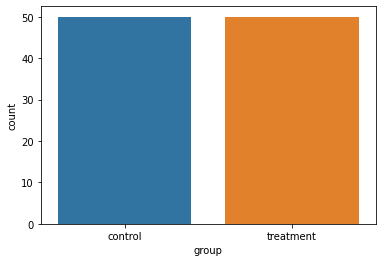

In [18]:
sns.countplot(data=EnewsExpressData,x='group')
plt.show()

In [19]:
#Landing Page Analysis
EnewsExpressData['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

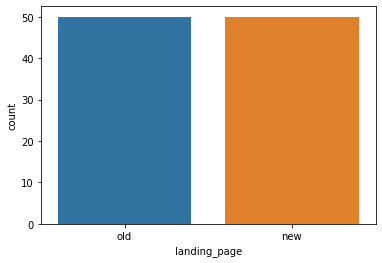

In [20]:
sns.countplot(data=EnewsExpressData, x='landing_page')
plt.show()

In [21]:
#Conversion Status Analysis
EnewsExpressData['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

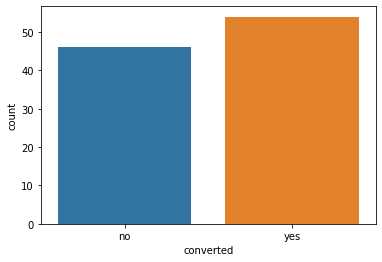

In [22]:
sns.countplot(data=EnewsExpressData, x='converted')
plt.show()

In [23]:
#Language Preferred Analysis
EnewsExpressData['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

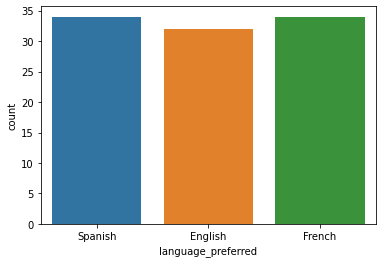

In [24]:
sns.countplot(data=EnewsExpressData, x='language_preferred')
plt.show()

### Bivariate Analysis

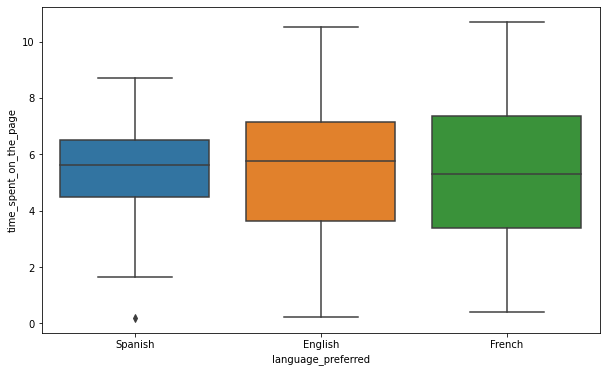

In [25]:
#Language Preferred vs. Time Spent On Page
plt.figure(figsize=(10,6))
sns.boxplot(data=EnewsExpressData, x='language_preferred', y='time_spent_on_the_page')
plt.show()

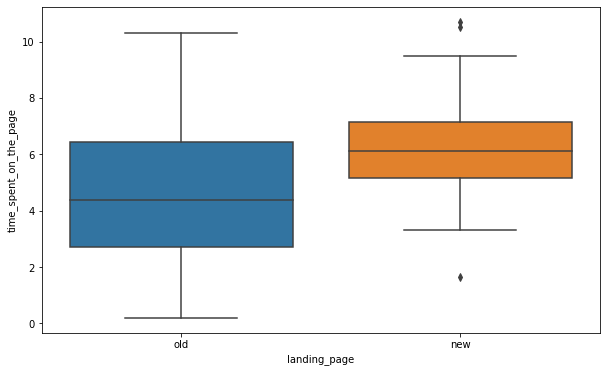

In [26]:
#Landing Page vs. Time Spent on Page
plt.figure(figsize=(10,6))
sns.boxplot(data=EnewsExpressData, x='landing_page', y='time_spent_on_the_page')
plt.show()

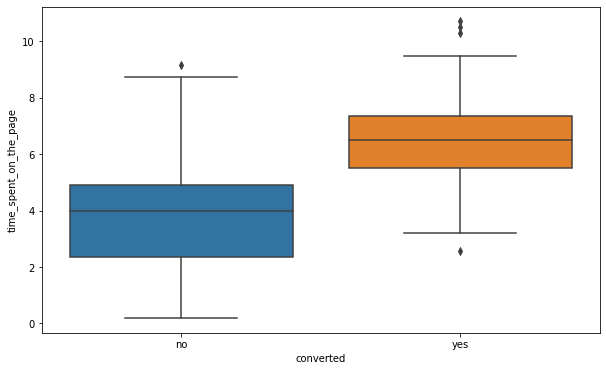

In [27]:
#Conversion Status vs. Time Spent on Page
plt.figure(figsize=(10,6))
sns.boxplot(data=EnewsExpressData, x='converted', y='time_spent_on_the_page')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

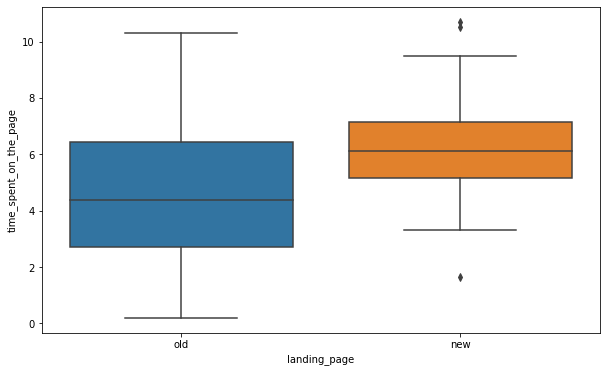

In [28]:
#Landing Page vs. Time Spent on Page
plt.figure(figsize=(10,6))
sns.boxplot(data=EnewsExpressData, x='landing_page', y='time_spent_on_the_page')
plt.show()

### Step 1: Define the null and alternate hypotheses

Null Hypothesis: People Spend an equal amount of time on the old site and new site.<br>
Alternative Hypothesis: The New Site performs better than the old site with time spent.
<br><br>
We are testing to confirm if the current web landing page is functioning just as well as the new landing page or if the new landing page is performing better than the current page.

### Step 2: Select Appropriate test

E-News Express requested for our team to compare data based from 2 Independant samples (old/current webpage vs. the new webpage). This would be an independent T-Test with a 1 tailed Hypothesis. The Standard Deviation is unknown at this time as well.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [29]:
# create subsetted data frame for new landing page users 
time_spent_new = EnewsExpressData[EnewsExpressData['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = EnewsExpressData[EnewsExpressData['landing_page'] == 'old']['time_spent_on_the_page'] ##Complete the code

In [30]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


### Step 5: Calculate the p-value

In [31]:
from scipy.stats import ttest_ind

# write the code to calculate the p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, alternative='greater') #complete the code by filling appropriate parameters in the blanks
print('The p-value is', p_value)

The p-value is 0.0001316123528095005


### Step 6: Compare the p-value with $\alpha$

In [32]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001316123528095005 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the P-Value is significantly less than the 5% level of Significance, we reject the null hypothesis. We have suffice evidence to prove that users spend more time on the newer landing page compared to the older landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

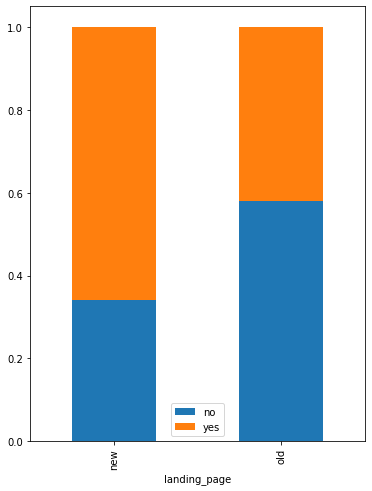

In [33]:
# complete the code to visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(EnewsExpressData['landing_page'],EnewsExpressData['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

### Step 1: Define The Null and Alternate Hypothesis



Null Hypothesis: The Old Site is No Different In Conversions to the New Site<br>
Alternate Hypothesis: The New Site Converts More than the Old Site</sub>

### Step 2: Select The Appropriate Test



Based off the 2 independent control and treatment groups for the old and new website, this would be a 2 Sample independent T-Test with a 1 tailed hypothesis.

### Step 3: Decide The Significance **Level**



As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Gather and Prepare The Data



In [34]:
# calculate the number of converted users in the treatment group
new_converted = EnewsExpressData[EnewsExpressData['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = EnewsExpressData[EnewsExpressData['group'] == 'control']['converted'].value_counts()['yes'] # complete your code here

n_control = EnewsExpressData.group.value_counts()['control'] # total number of users in the control group
n_treatment = EnewsExpressData.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [35]:
# complete the code to import the required function
from statsmodels.stats.proportion import proportions_ztest
# write the code to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control])   #complete the code by filling appropriate parameters in the blanks


print('The p-value is', p_value)

The p-value is 0.016052616408112556


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Step 6: Compare the p-value with $\alpha$

In [36]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the P-Value is significantly less than the level of significance, we reject the null hypothesis. We have suffice evidence to support that the conversion rate for the old site is less than the new site.

## 3. Is the conversion and preferred language are independent or related?

### Visual Analysis


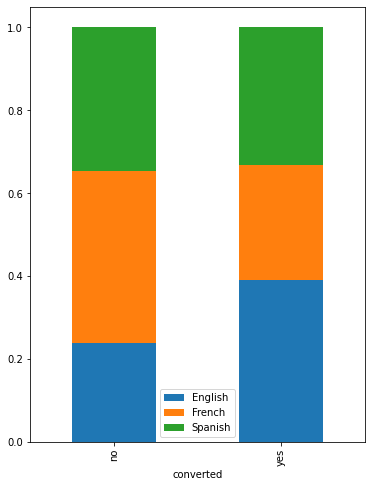

In [37]:
# complete the code to visually plot the dependency between conversion status and preferred langauge
pd.crosstab(EnewsExpressData['converted'],EnewsExpressData['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

### Step 1: Define The Null and Alternate Hypothesis



Null Hypothesis: Conversion and Language are Related<br>
Alternate Hypothesis: Conversion and Language are Independent<br>
We are testing to see if these categories are independent or related.

### Step 2: Select Appropriate test

We are testing if there is any correlation between the languages and site conversions. These are both categorical variables. Based off this finding, we compare using the Chi Squared Test of Independance. 

### Step 3: Decide the Significance Level


As given in the problem statement, we select $\alpha = 0.05$.



###Step 4: Gather and Prepare Data

In [38]:
# complete the code to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(EnewsExpressData['converted'], EnewsExpressData['language_preferred'])  

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate The P-Value

In [39]:
# complete the code to import the required function
from scipy.stats import chi2_contingency  

# write the code to calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)   # #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [40]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw Inference

The P-value is signifcantly greater than the level of significance. Based of this finding, we fail to reject the null hypothesis. We possess enough information to determine if language is not related/independant to the conversions.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [41]:
# create a new DataFrame for users who got served the new page
EnewsExpress_new = EnewsExpressData[EnewsExpressData['landing_page'] == 'new']

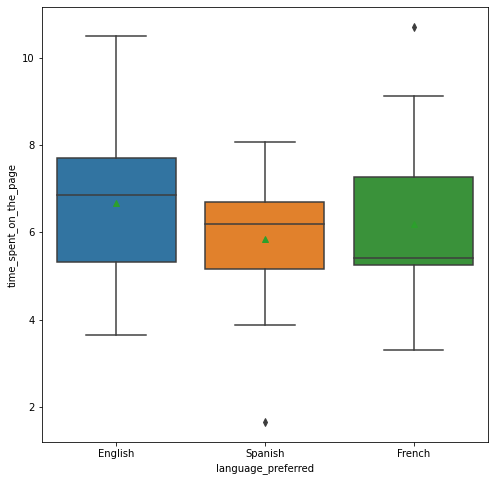

In [42]:
# complete the code to visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = EnewsExpress_new)
plt.show()

### Step 1: Define the null and alternate hypotheses

Null Hypothesis: The Time Spent on the Website is Different for each users from language.<br>
Alternate Hypothesis: The Time Spent on the website is not different for users from language.


### Step 2: Select Appropriate Test

Based on comparing the means of English, Spanish and French languages, we would use the ANOVA Test to compare the independent populations.

### Step 3: Decide The Significance Level

As given in the problem statement, we select $\alpha = 0.05$.



### Step 4: Gather and Prepare Data

In [43]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = EnewsExpress_new[EnewsExpress_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = EnewsExpress_new[EnewsExpress_new['language_preferred']=='French']['time_spent_on_the_page']   # complete your code here
time_spent_Spanish = EnewsExpress_new[EnewsExpress_new['language_preferred']=='Spanish']['time_spent_on_the_page']   # complete your code here

### Step 5: Calculate The P-Value

In [48]:
# complete the code to import the required function
from scipy.stats import f_oneway 

# write the code to calculate the p-value
test_stat, p_value =  stats.f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)  #complete the code by filling appropriate parameters in the blanks
print('The p-value is', p_value)
stats.f_oneway(time_spent_English, time_spent_French, time_spent_Spanish) 

The p-value is 0.43204138694325955


F_onewayResult(statistic=0.8543992770006822, pvalue=0.43204138694325955)

### Step 6: Compare the p-value with $\alpha$


In [45]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw Inference

The P-Value is significantly greater than the level of significance. As a result, we fail to reject the null hypothesis. We possess enough evidence from the sample data to prove that the time spent is not different for each language user.

## Conclusion and Business Recommendations

In conclusion, our research shows that the new site did in fact convert more than the old site in terms of subscribers. The Old site had controlled group of 50 users and the New Site had a treatment group of 50 users. Our data shows that the new site retained users for at least 2 minutes and 50 seconds vs. the old site retaining users for 1 minute and 82 seconds (roughly 2 minutes and 22 seconds).


<br>The preferred language for E-News Express is English. It would benefit E-News Express to ensure the site appeals to English speakers as they spend the most time on the website. It would benefit E-News Express to ensure that the site does continue to provide translations as users with different languages do access E-News Express. 



___